In [1]:
%matplotlib inline
import pandas
import json

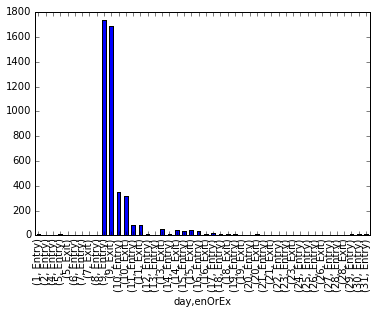

In [2]:
df1 = pandas.read_json('~/Downloads/footfall.json')
df1['footfall'] =  pandas.to_datetime(df1['footfallTime'],infer_datetime_format=True)
df1['footfall_day'] = df1['footfall'].dt.day

df1#.set_index('footfall')

#2017-09-09T15:50:35Z
# counts day, entry or exit
df = pandas.DataFrame({'day': df1.footfall_day, 'enOrEx': df1.entryOrExit})
countsByDay = df.groupby(['day', 'enOrEx']).size()
countsByDay.plot(kind='bar')

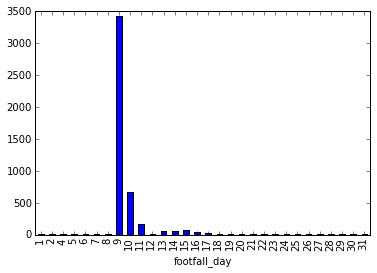

In [3]:
# counts day, entry/exit combined
df1.groupby('footfall_day').aggregate('count')['entryOrExit'].plot(kind='bar')

In [4]:
df1['placeID'].unique()
df1.groupby(['placeID','footfall_day']).aggregate('count')['entryOrExit']

placeID                               footfall_day
0328eb4b-fcd2-40f8-a71c-3f0833c57c9e  1                  9
                                      4                  4
                                      5                 11
                                      6                  4
                                      7                  2
                                      8                  2
                                      9                  1
                                      10                 6
                                      11                 7
                                      12                 9
                                      13                35
                                      14                51
                                      15                59
                                      16                35
                                      17                14
                                      18                12
     

In [5]:
# WHERE is becaon Id?
jsonstr = """[{"footfallTime": "2017-09-09T15:50:35Z", "all": "All", "entryOrExit": "Exit", 
"footfallID": "9e0cd752-e2f9-4530-a678-40e1e6a38df9", "updateTime": "2017-09-14T05:13:17.163Z", 
"createTime": "2017-09-14T05:13:17.163Z", "placeID": "1ks11ec001", "source": "DorSensor", "doorSensorID": "1112"}]"""
pandas.read_json(jsonstr)

,all,createTime,doorSensorID,entryOrExit,footfallID,footfallTime,placeID,source,updateTime
0,All,2017-09-14T05:13:17.163Z,1112,Exit,9e0cd752-e2f9-4530-a678-40e1e6a38df9,2017-09-09T15:50:35Z,1ks11ec001,DorSensor,2017-09-14T05:13:17.163Z
